In [3]:
import numpy as np
from scipy.integrate import simpson as simps

def f(x, y, x_prime, y_prime):
    # Define the function f( r - r' )
    # Replace this with the actual function
    return np.exp(-((x - x_prime)**2 + (y - y_prime)**2))

def integrate_2d_simps(f, x_range, y_range, x_prime_range, y_prime_range, num_points=100):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    x_prime = np.linspace(x_prime_range[0], x_prime_range[1], num_points)
    y_prime = np.linspace(y_prime_range[0], y_prime_range[1], num_points)

    integral = 0.0

    for i in range(num_points):
        for j in range(num_points):
            integrand = np.zeros((num_points, num_points))
            for k in range(num_points):
                for l in range(num_points):
                    integrand[k, l] = f(x[i], y[j], x_prime[k], y_prime[l])
            integral += simps(simps(integrand, y_prime), x_prime)

    dx = (x_range[1] - x_range[0]) / (num_points - 1)
    dy = (y_range[1] - y_range[0]) / (num_points - 1)

    integral *= dx * dy

    return integral

# Define the ranges for integration
x_range = [0, 1]
y_range = [0, 1]
x_prime_range = [0, 1]
y_prime_range = [0, 1]

result = integrate_2d_simps(f, x_range, y_range, x_prime_range, y_prime_range, num_points=50)
print(f"Integral result: {result}")


C:\Users\danij\AppData\Local\Temp\ipykernel_12240\4267600617.py:23: DeprecationWarning: You are passing x=[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral += simps(simps(integrand, y_prime), x_prime)


Integral result: 0.7686470066313951


Modelo de galaxia Eliptica

Deflection core radius $\theta_c$

$$
\Sigma(\theta_1, \theta_2) = (\theta_c^2 + (1-\epsilon) \theta_1^2 + (1+\epsilon) \theta_2^2)^{-1/2}
$$

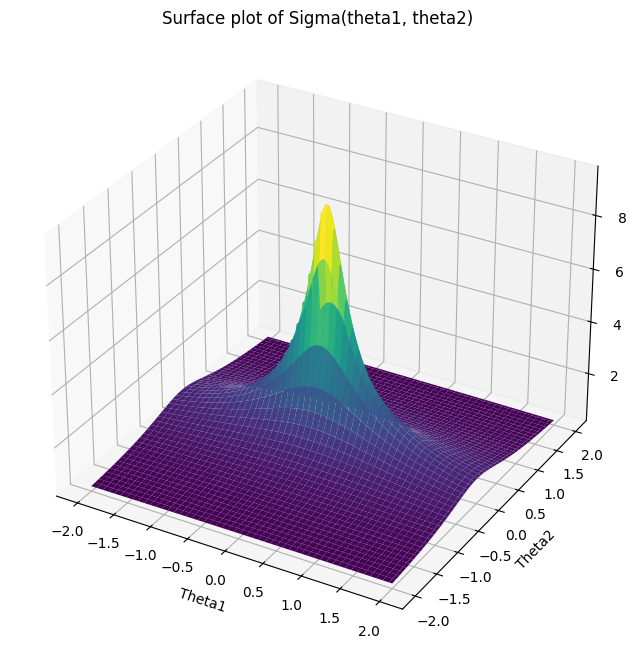

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps = 0.8
thetac = 0.1

Sigma = lambda theta1, theta2: 1/np.sqrt(thetac**2 + (1 - eps)*theta1**2 + (1 + eps)*theta2**2  )


# Generación de la malla de puntos
theta1_range = np.linspace(-2, 2, 100)
theta2_range = np.linspace(-2, 2, 100)
theta1, theta2 = np.meshgrid(theta1_range, theta2_range)

# Evaluación de la función Sigma en la malla de puntos
Z = Sigma(theta1, theta2)

# Creación de la gráfica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta1, theta2, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Sigma')

# Título de la gráfica
ax.set_title('Surface plot of Sigma(theta1, theta2)')

# Mostrar la gráfica
plt.show()

C:\Users\danij\AppData\Local\Temp\ipykernel_12240\2346326707.py:21: DeprecationWarning: You are passing x=[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.9494

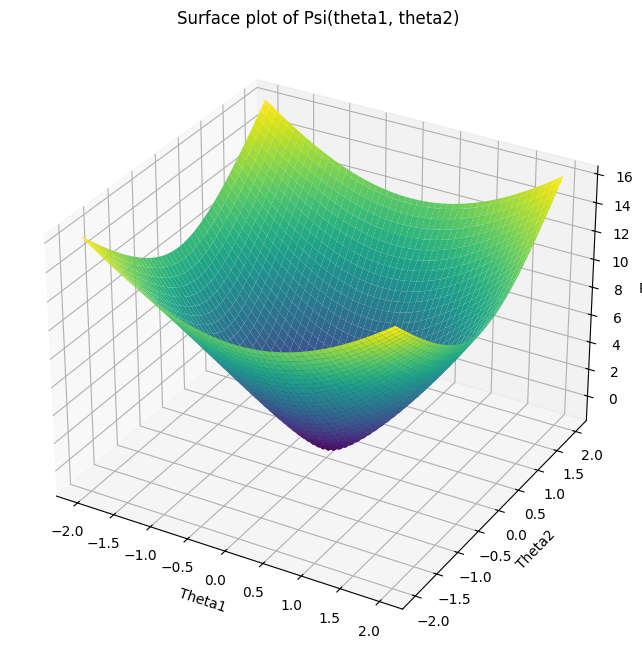

In [5]:
# Definición de la función integranda
def integrand(theta1, theta2, theta1_prime, theta2_prime):
    distance = np.sqrt((theta1 - theta1_prime)**2 + (theta2 - theta2_prime)**2)
    return np.log(np.abs(distance) + 1e-10) * Sigma(theta1_prime, theta2_prime)

# Rango y resolución de la malla
theta1_range = np.linspace(-2, 2, 100)
theta2_range = np.linspace(-2, 2, 100)
theta1, theta2 = np.meshgrid(theta1_range, theta2_range)

# Función para calcular la integral en un punto específico
def psi(theta1, theta2, theta1_range, theta2_range, num_points=100):
    theta1_prime = np.linspace(theta1_range[0], theta1_range[1], num_points)
    theta2_prime = np.linspace(theta2_range[0], theta2_range[1], num_points)
    integrand_values = np.zeros((num_points, num_points))
    
    for i in range(num_points):
        for j in range(num_points):
            integrand_values[i, j] = integrand(theta1, theta2, theta1_prime[i], theta2_prime[j])
    
    integral_value = simps(simps(integrand_values, theta2_prime), theta1_prime)
    return integral_value

# Calcular el valor de psi en cada punto de la malla
psi_values = np.zeros_like(theta1)

for i in range(len(theta1_range)):
    for j in range(len(theta2_range)):
        psi_values[i, j] = psi(theta1[i, j], theta2[i, j], [-2, 2], [-2, 2], num_points=100)

# Gráfica de psi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta1, theta2, psi_values, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Psi')

# Título de la gráfica
ax.set_title('Surface plot of Psi(theta1, theta2)')

# Mostrar la gráfica
plt.show()